# PM2.5 Air-Pollution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df= pd.read_csv('Airpollution_dataset.csv')

In [3]:
df.head(10)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
5,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
6,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
7,8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
8,9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0
9,10,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0


In [4]:
df.shape

(43824, 13)

# Data Pre-processing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [6]:
print(df.describe())

                 No          year         month           day          hour  \
count  43824.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean   21912.500000   2012.000000      6.523549     15.727820     11.500000   
std    12651.043435      1.413842      3.448572      8.799425      6.922266   
min        1.000000   2010.000000      1.000000      1.000000      0.000000   
25%    10956.750000   2011.000000      4.000000      8.000000      5.750000   
50%    21912.500000   2012.000000      7.000000     16.000000     11.500000   
75%    32868.250000   2013.000000     10.000000     23.000000     17.250000   
max    43824.000000   2014.000000     12.000000     31.000000     23.000000   

              pm2.5          DEWP          TEMP          PRES           Iws  \
count  41757.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean      98.613215      1.817246     12.448521   1016.447654     23.889140   
std       92.050387     14.433440     12.198613    

In [7]:
df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [8]:
#dropping column with null values
df.dropna(inplace=True)

In [9]:
df.shape

(41757, 13)

In [10]:
#drop the column no.
df.drop("No", axis=1, inplace=True)

In [11]:
# Encode the categorical wind direction -cbwd
le = LabelEncoder()
df['cbwd'] = le.fit_transform(df['cbwd'])

In [12]:
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,2010,1,2,0,129.0,-16,-4.0,1020.0,2,1.79,0,0
25,2010,1,2,1,148.0,-15,-4.0,1020.0,2,2.68,0,0
26,2010,1,2,2,159.0,-11,-5.0,1021.0,2,3.57,0,0
27,2010,1,2,3,181.0,-7,-5.0,1022.0,2,5.36,1,0
28,2010,1,2,4,138.0,-7,-5.0,1022.0,2,6.25,2,0


# Exploratory Data Analysis

In [13]:
# Split the dataset into features (X) and the target variable (y)
X = df.drop("pm2.5", axis=1)
y = df["pm2.5"]

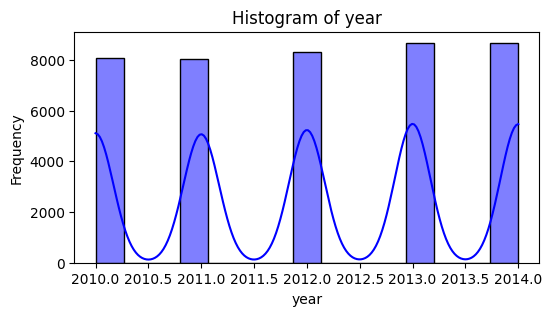

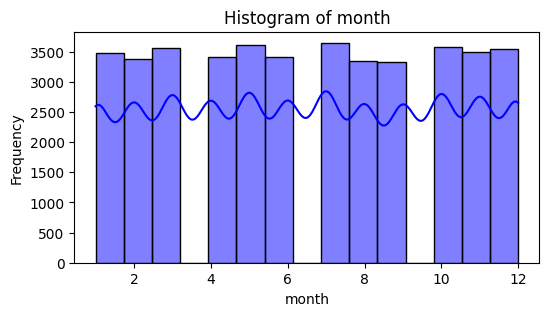

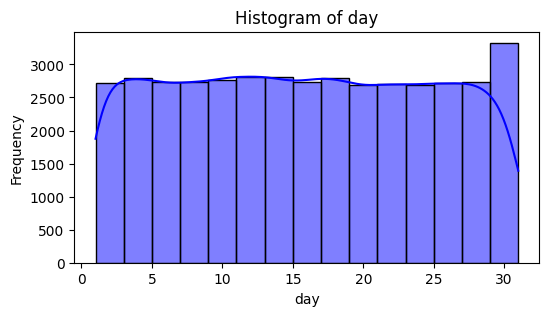

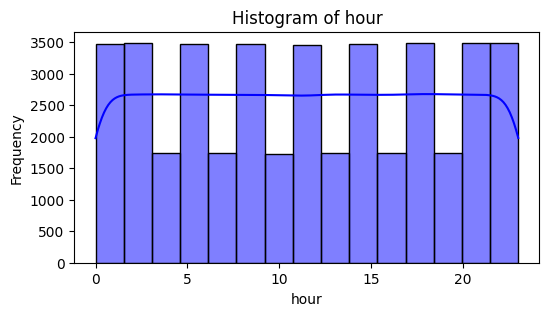

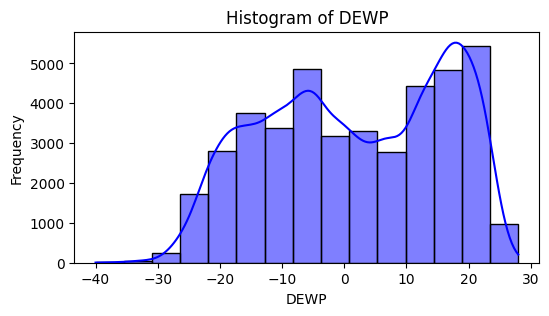

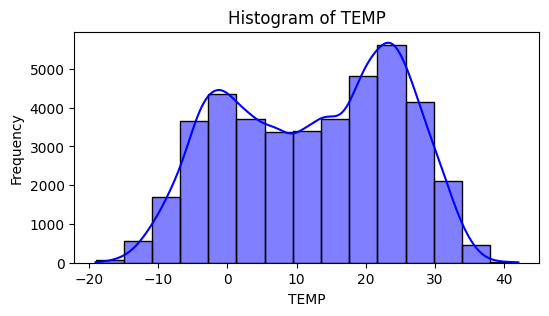

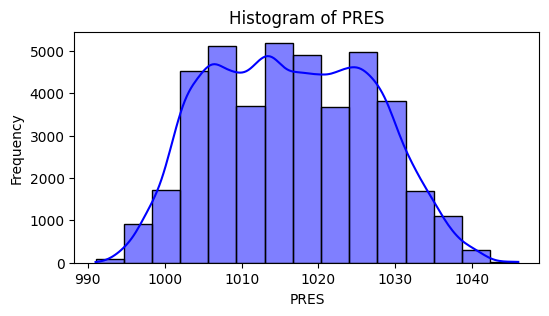

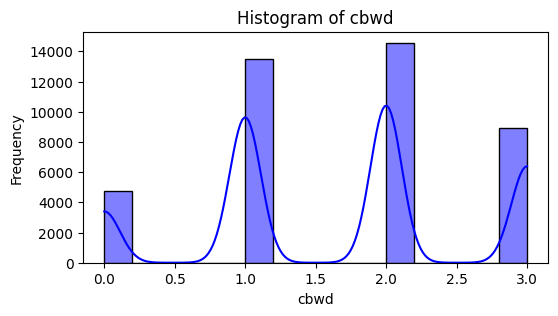

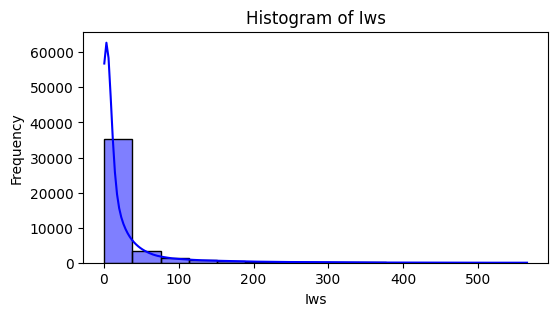

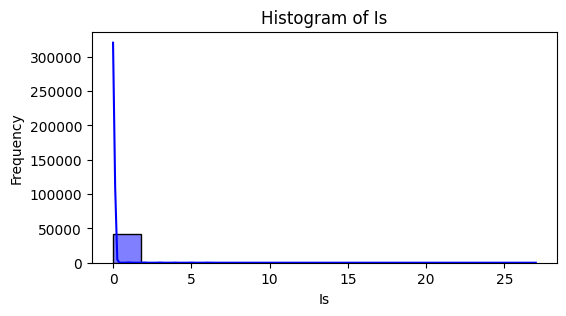

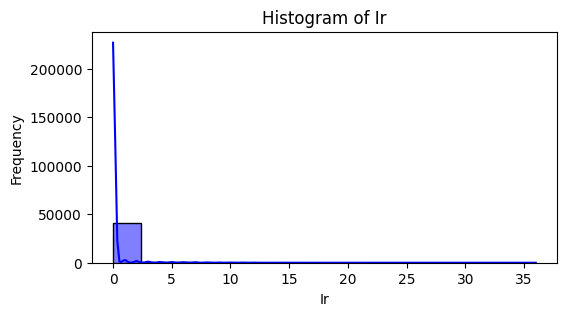

In [14]:
for column in X:
    plt.figure(figsize=(6,3))
    sns.histplot(x=X[column], stat="count", color="blue", bins=15, kde={'alpha': 0.5})
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

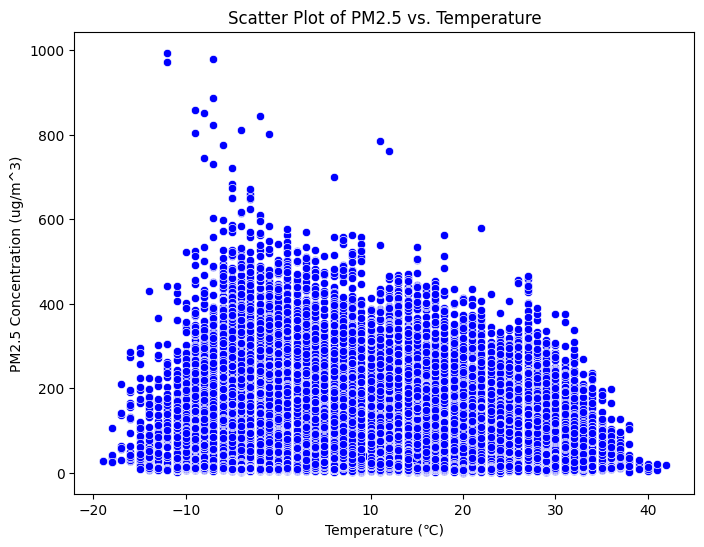

In [15]:
#Scatter Plot between PM2.5 and Temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TEMP', y='pm2.5', data=df, color='blue')
plt.xlabel('Temperature (℃)')
plt.ylabel('PM2.5 Concentration (ug/m^3)')
plt.title('Scatter Plot of PM2.5 vs. Temperature')
plt.show()

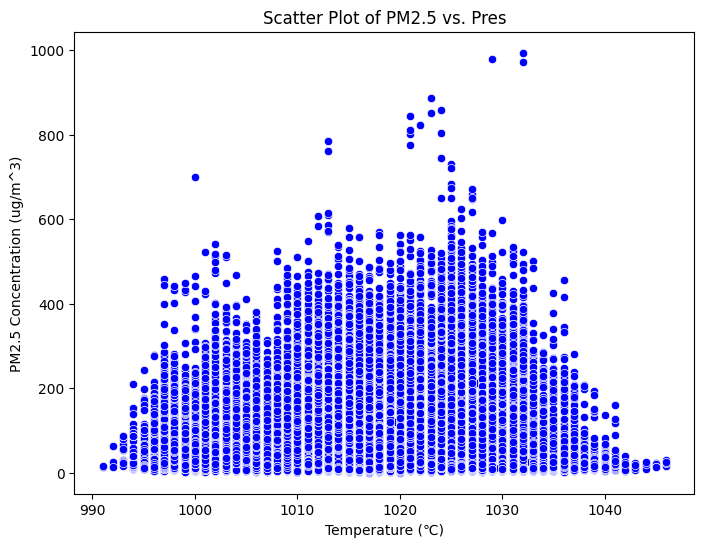

In [16]:
# Scatter Plot between PM2.5 and Pres
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PRES', y='pm2.5', data=df, color='blue')
plt.xlabel('Temperature (℃)')
plt.ylabel('PM2.5 Concentration (ug/m^3)')
plt.title('Scatter Plot of PM2.5 vs. Pres')
plt.show()

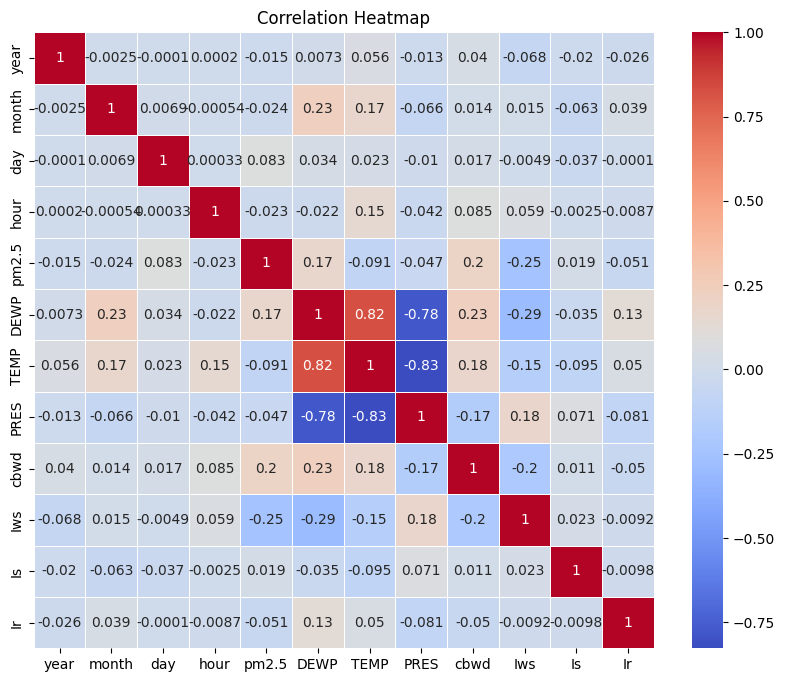

In [17]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Model Building

In [18]:
#Linear Regression model
from sklearn.model_selection import train_test_split ,GridSearchCV , cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [20]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = linear_model.predict(X_test)

In [22]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [23]:
print("Linear Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Linear Regression Metrics:
Mean Squared Error (MSE): 5836.695704967
Root Mean Squared Error (RMSE): 76.39827030088443
R-squared (R2): 0.2824320013436268


In [24]:
#Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
# Make predictions on the training and test data
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

# Evaluate the model's performance on training and test data
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Set Metrics:")
print("Mean Squared Error (MSE):", train_mse)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R-squared (R2):", train_r2)

print("\nTest Set Metrics:")
print("Mean Squared Error (MSE):", test_mse)
print("Root Mean Squared Error (RMSE):", test_rmse)
print("R-squared (R2):", test_r2)

# Compare training and test R-squared values
print("R-squared Difference (Train - Test):", train_r2 - test_r2)

Training Set Metrics:
Mean Squared Error (MSE): 182.8083903906601
Root Mean Squared Error (RMSE): 13.520665308728713
R-squared (R2): 0.9786376343598545

Test Set Metrics:
Mean Squared Error (MSE): 1248.165104394157
Root Mean Squared Error (RMSE): 35.32938018695144
R-squared (R2): 0.8465495922306434
R-squared Difference (Train - Test): 0.1320880421292111


In [25]:
# Cross validation
cv_scores = cross_val_score(rf_regressor, X, y, scoring='neg_mean_squared_error', cv=5)
cv_r2_scores = cross_val_score(rf_regressor, X, y, scoring='r2', cv=5)

# Calculate the mean R2 value
mean_cv_r2 = np.mean(cv_r2_scores)
cv_rmse_scores = np.sqrt(-cv_scores)
mean_cv_rmse = cv_rmse_scores.mean()
std_cv_rmse = cv_rmse_scores.std()


print("Cross-Validation RMSE Scores:")
print(cv_rmse_scores)
print("\nMean Cross-Validation RMSE:", mean_cv_rmse)
print("Standard Deviation of Cross-Validation RMSE:", std_cv_rmse)
print("Cross-Validation R-squared (R2) Scores:")
print(cv_r2_scores)
print("\nMean Cross-Validation R-squared (R2):", mean_cv_r2)

Cross-Validation RMSE Scores:
[73.28388052 75.72874362 68.15840504 67.1533292  67.54642816]

Mean Cross-Validation RMSE: 70.37415730948774
Standard Deviation of Cross-Validation RMSE: 3.476130828714592
Cross-Validation R-squared (R2) Scores:
[0.36116681 0.39891703 0.40892396 0.40782514 0.48676738]

Mean Cross-Validation R-squared (R2): 0.4127200620807209


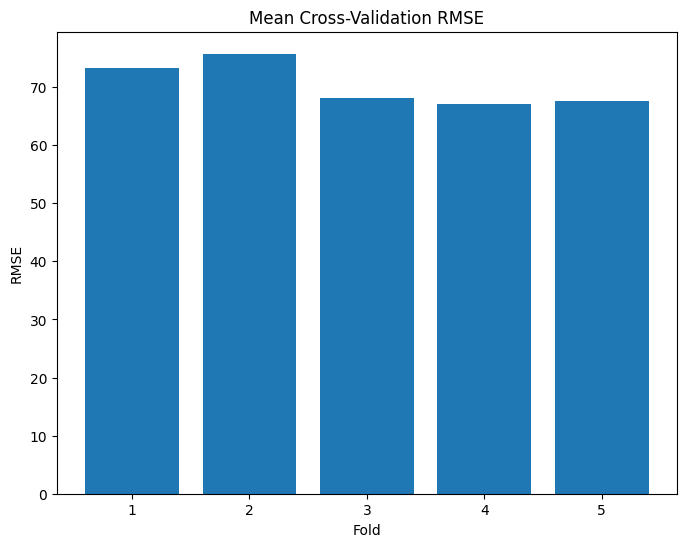

In [26]:
# Bar Plot of Mean Cross-Validation RMSE
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), cv_rmse_scores)
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Mean Cross-Validation RMSE')
plt.show()

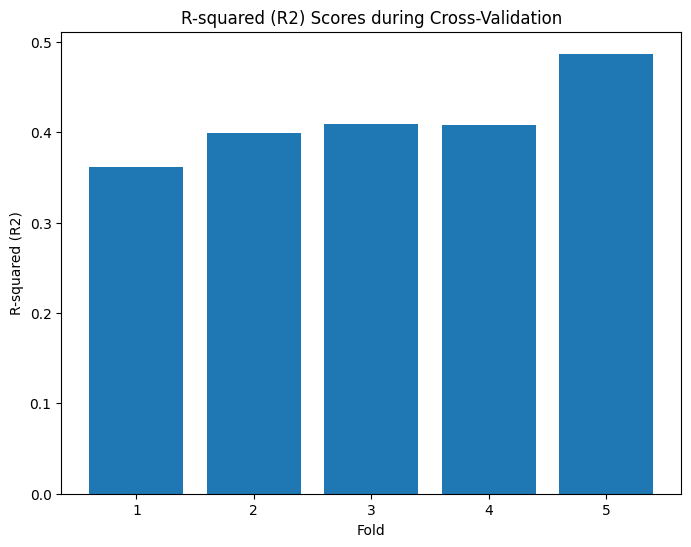

In [27]:
# Bar Plot of R-squared (R2) Scores during Cross-Validation
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), cv_r2_scores)
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('R-squared (R2)')
plt.title('R-squared (R2) Scores during Cross-Validation')
plt.show()